In [1]:
## EDIT:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/'

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow import keras
from tensorflow.keras import layers
import time

import sys
sys.path.append(base_dir+'functions/')
from utils import split_retrain, plot_results
from exp_hp import get_hp

2024-08-06 16:25:41.667063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


### Fuctions

In [3]:
# ---------------- LEARNING RATE CALLBACK FUNCTION ----------------
# def scheduler(epoch, lr):
#     # This function keeps the initial learning rate for the first ten epochs
#     # and decreases it exponentially after that.
#     if epoch > 10:
#         return lr
#     else:
#         return lr * tf.constant(.9,dtype=tf.float32)

In [4]:
def create_ann2(input_shape,output_shape, hiddens, RIDGE = 0, dropout = True, dropout_rate = 0.0):
    tf.keras.backend.clear_session() 

    # ----- input of cnn -----
    ann_input = keras.Input(shape = input_shape)

    for l,layer in enumerate(hiddens):
        # ----- ann layers -----
        if l == 0:
            x = tf.keras.layers.Dense(layer, 
                                      activation = 'relu',
                                      use_bias = True, 
                                      kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=RIDGE),
                                      bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                      kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(ann_input)
            if dropout:
                x = layers.Dropout(rate = dropout_rate)(x)
        else:
            x = tf.keras.layers.Dense(layer, 
                                      activation = 'relu',
                                      use_bias = True, 
                                      kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=0.0),
                                      bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                      kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(x)
        
    # ----- output -----
    ann_output = tf.keras.layers.Dense(output_shape,
                                       activation = tf.keras.activations.softmax,
                                       use_bias = True,
                                       kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=0.0),
                                       bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                       kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(x)
    # ----- create unet -----
    ann = keras.Model(ann_input, ann_output, name = 'ann')
    
    return ann

6
Training Members: ['0201', '0211', '0221', '0231', '0241', '0251', '0261']
Validation Member: 0291
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
loading data & saving
0


2024-08-06 16:26:00.125707: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Elapsed time during fit = 0.90 minutes



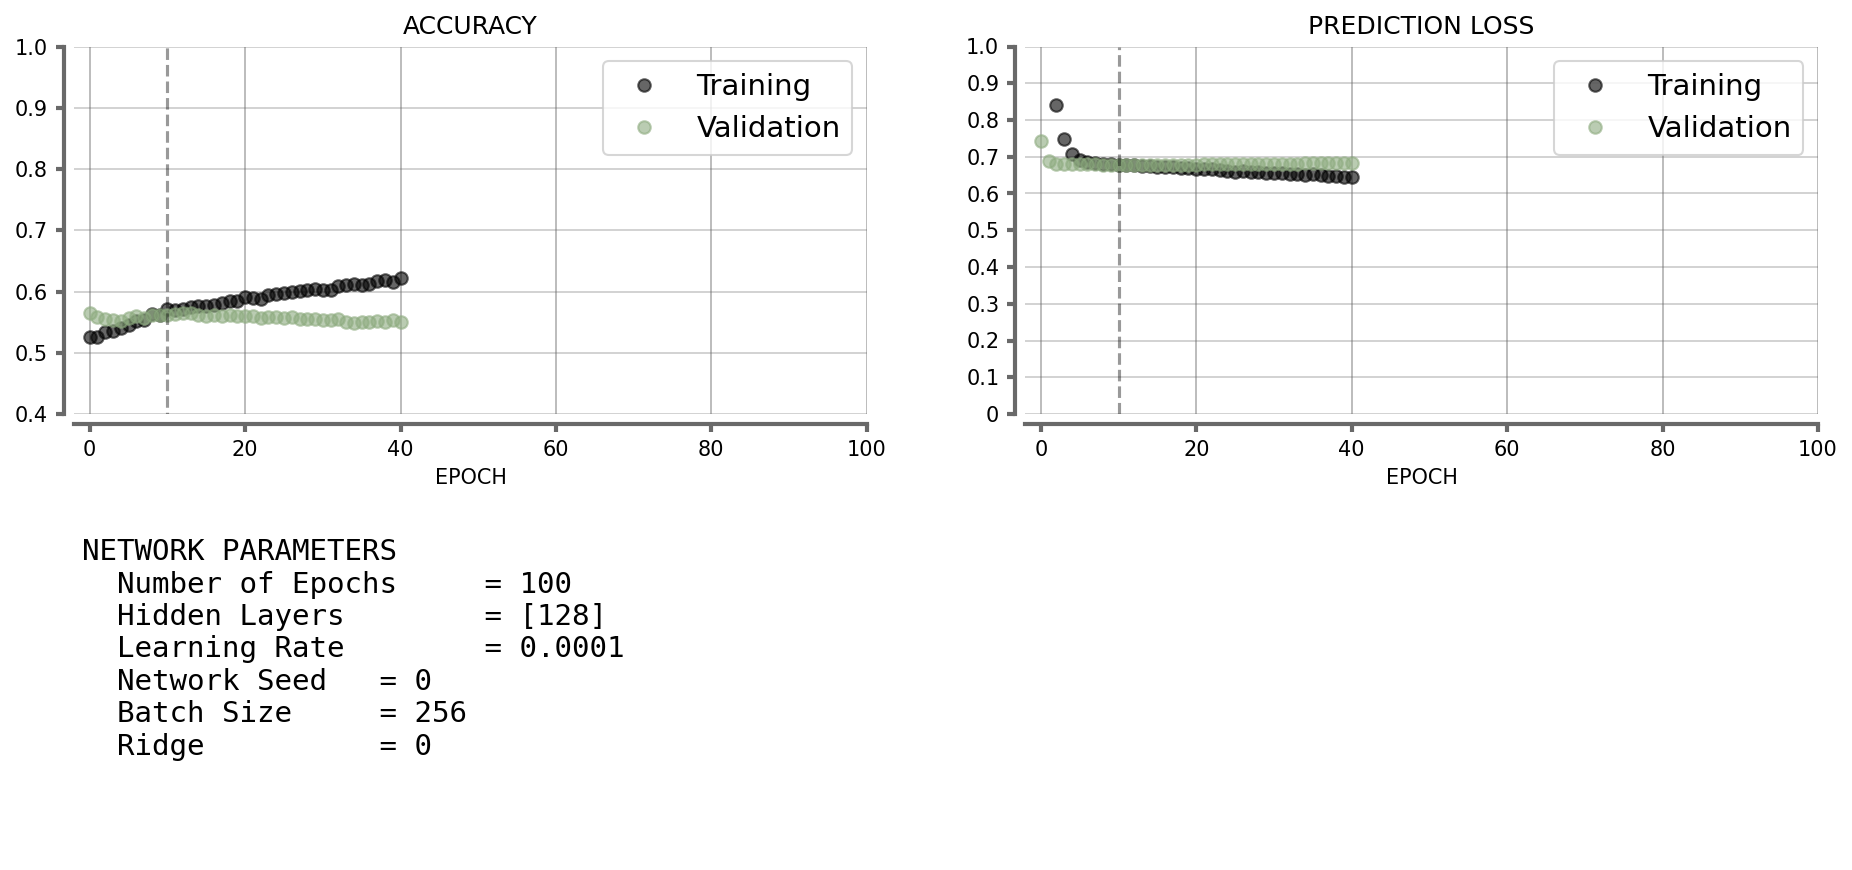

1
Elapsed time during fit = 0.97 minutes

2
Elapsed time during fit = 0.75 minutes

3
Elapsed time during fit = 0.92 minutes

4
Elapsed time during fit = 0.86 minutes

5
Elapsed time during fit = 0.97 minutes

6
Elapsed time during fit = 0.92 minutes

7
Elapsed time during fit = 0.86 minutes

8
Elapsed time during fit = 0.93 minutes

9
Elapsed time during fit = 1.04 minutes

243/243 [==============================] - 0s 718us/step
56.29190304280557
55.89221248066013
7
Training Members: ['0201', '0211', '0221', '0231', '0241', '0251', '0261', '0271']
Validation Member: 0291
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
loading data & saving
0
Elapsed time during fit = 1.01 minutes



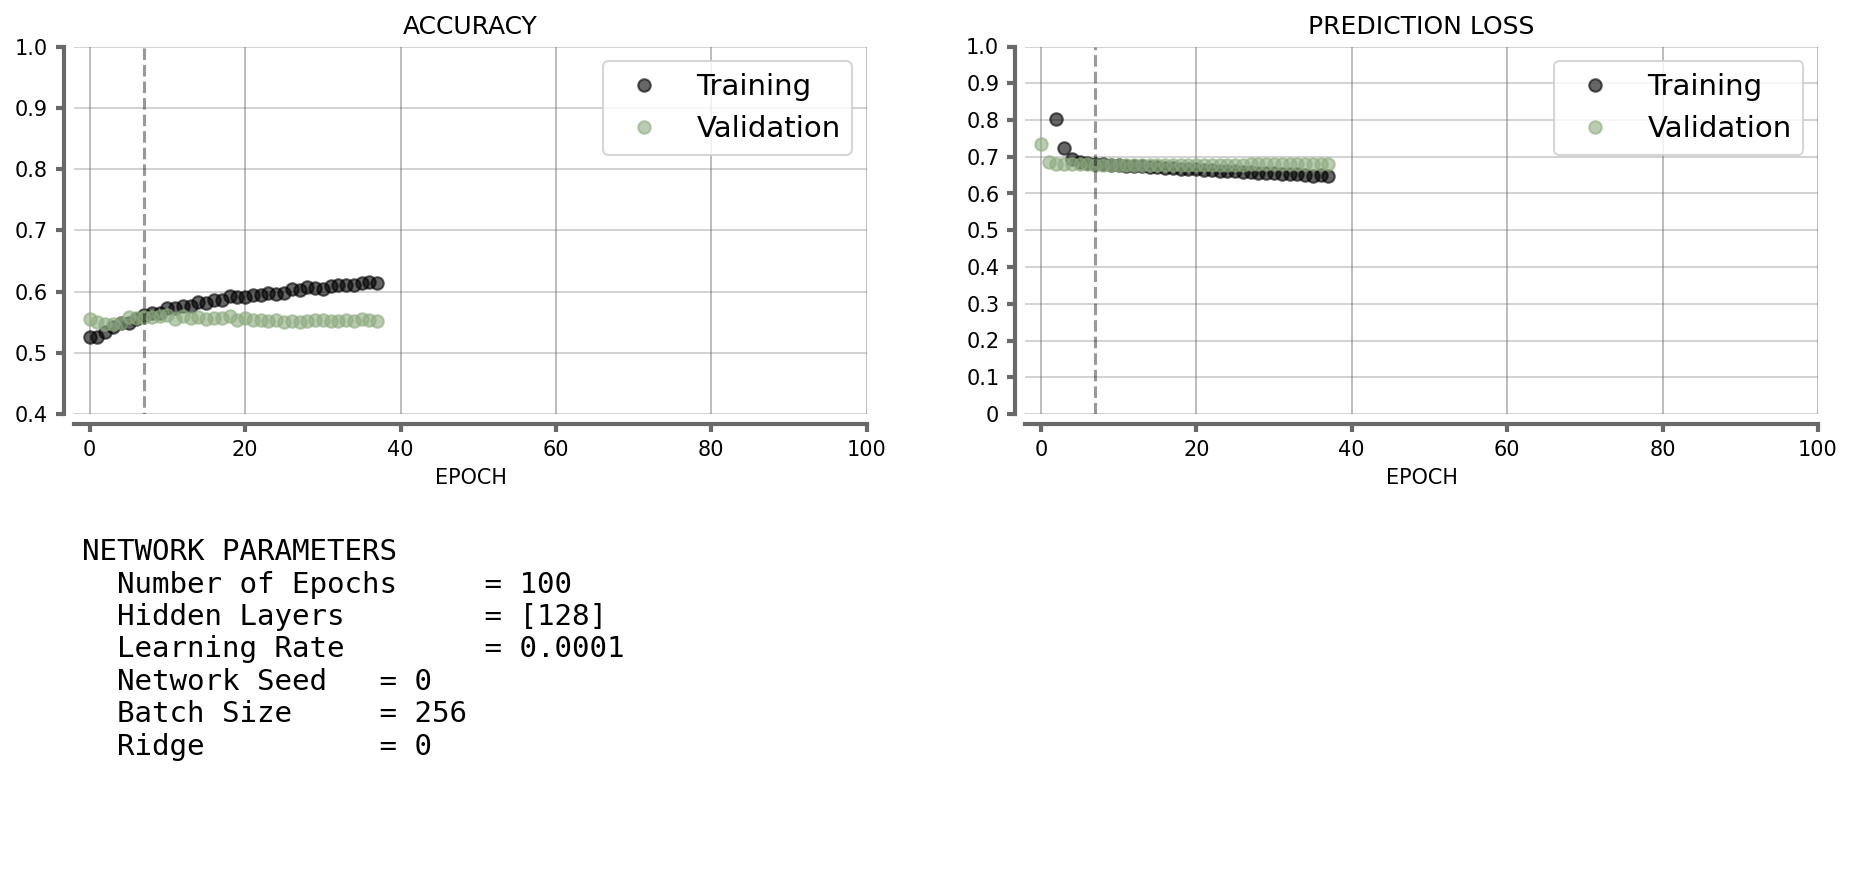

1
Elapsed time during fit = 1.07 minutes

2
Elapsed time during fit = 0.87 minutes

3
Elapsed time during fit = 1.20 minutes

4
Elapsed time during fit = 1.15 minutes

5
Elapsed time during fit = 0.85 minutes

6
Elapsed time during fit = 1.02 minutes

7
Elapsed time during fit = 1.08 minutes

8
Elapsed time during fit = 1.24 minutes

9
Elapsed time during fit = 1.17 minutes

243/243 [==============================] - 0s 874us/step
56.25482625482625
55.907335907335906
8
Training Members: ['0201', '0211', '0221', '0231', '0241', '0251', '0261', '0271', '0281']
Validation Member: 0291
Testing Member: 0301
Lead: 14
Region: 30-60N x 170-240E
loading data & saving
0
Elapsed time during fit = 1.25 minutes



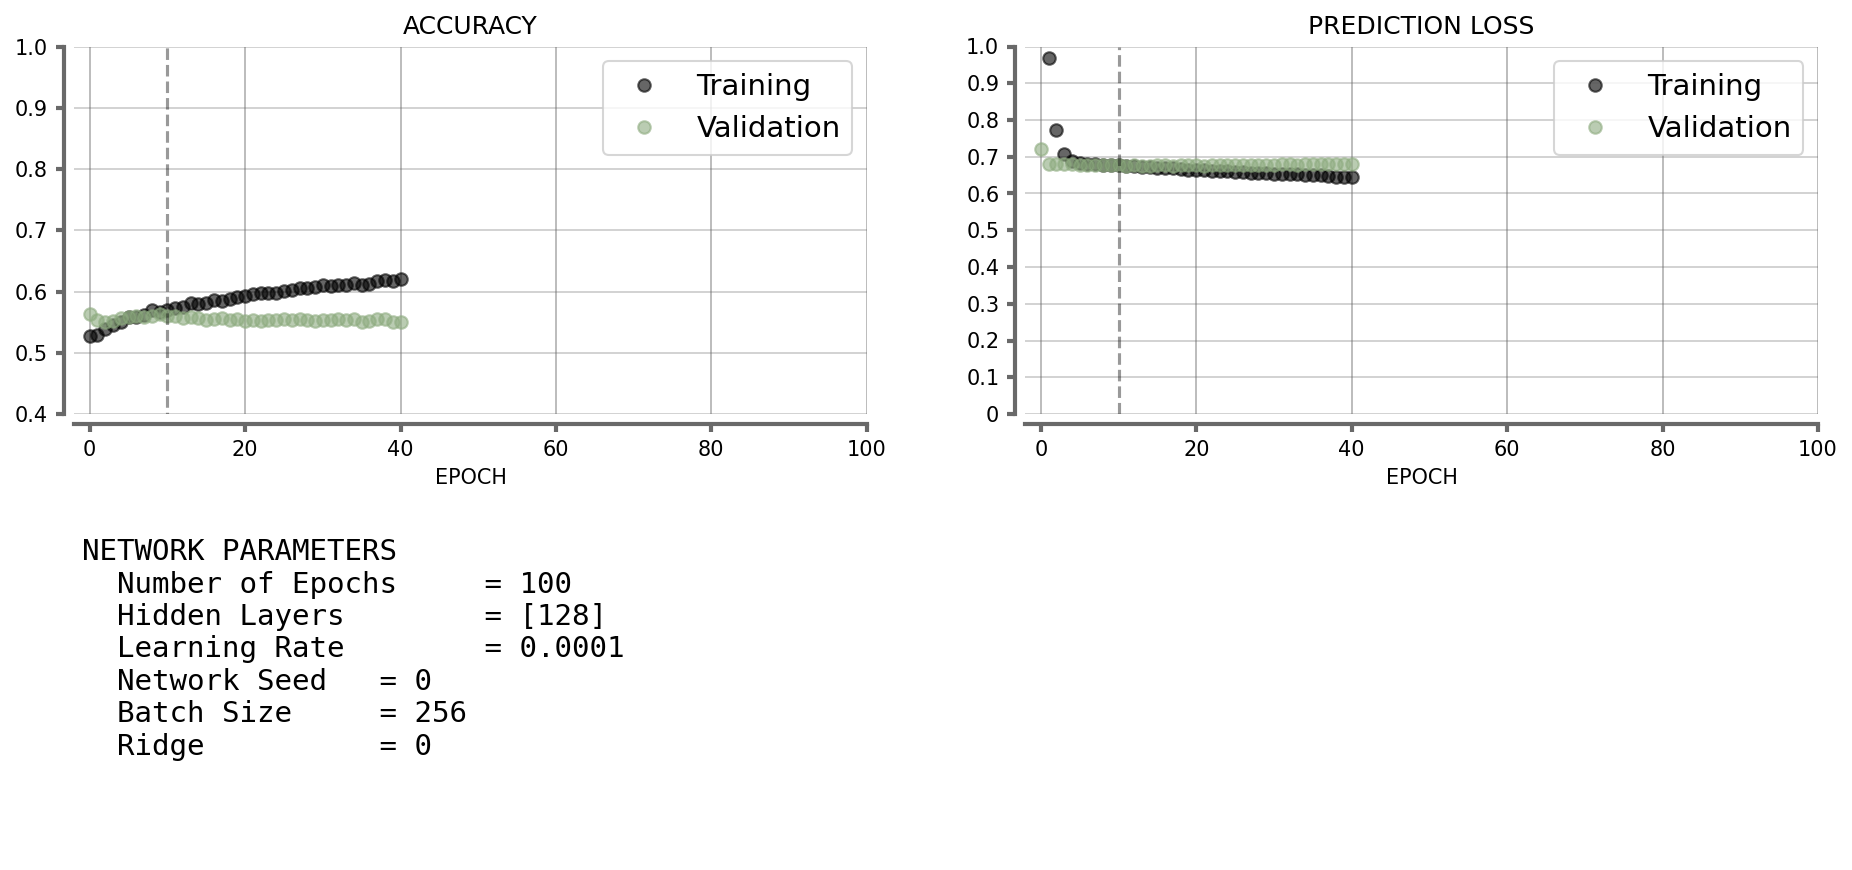

1
Elapsed time during fit = 1.99 minutes

2
Elapsed time during fit = 2.04 minutes

3
Elapsed time during fit = 1.25 minutes

4
Elapsed time during fit = 1.24 minutes

5
Elapsed time during fit = 1.46 minutes

6
Elapsed time during fit = 1.21 minutes

7
Elapsed time during fit = 1.19 minutes

8
Elapsed time during fit = 1.22 minutes

9
Elapsed time during fit = 1.46 minutes

243/243 [==============================] - 0s 703us/step
56.23711340206186
55.82474226804124
CPU times: user 29min 8s, sys: 22.8 s, total: 29min 30s
Wall time: 45min 56s


In [5]:
%%time
EXP_NAME2 = 'exp2_retrain_increase'
hps2 = get_hp(EXP_NAME2)
EXP_NAME = 'exp2'
hps = get_hp(EXP_NAME)

for i_trainmems in np.arange(6,9):
    print(i_trainmems)
    print('Training Members: '+str(hps2['train_mems'][i_trainmems]))
    print('Validation Member: '+str(hps2['val_mems'][0]))
    print('Testing Member: '+str(hps2['test_mems'][0]))
    print('Lead: '+str(hps2['LEAD']))
    print('Region: '+str(hps2['region'][0])+'N x '+str(hps2['region'][1])+'E')

    X2train, X2val, _, Y2train, Y2val, _, _ = split_retrain(trainmems = hps2['train_mems'][i_trainmems],
                                                              valmem = hps2['val_mems'][0],
                                                              testmem = hps2['test_mems'][0],
                                                              months = [11,12,1,2], # months for X (Y+leadtime are accounted for in function)
                                                              lead = hps2['LEAD']) # 330 or 210

    X2val = X2val.reshape((X2val.shape[0],X2val.shape[1]*X2val.shape[2]))
    X2train = X2train.reshape((X2train.shape[0],X2train.shape[1]*X2train.shape[2]))
    input_shape = X2train.shape[1]

    # ---------- ANN Hyperparameters ----------
    NLABEL = 2
    N_EPOCHS = 1000

    hps = get_hp(EXP_NAME) # need to have this here because .extend overwrites HIDDENS

    HIDDENS = hps['HIDDENS']    
    GLOBAL_SEED = hps['GLOBAL_SEED']
    # HIDDENS.extend(ann2HIDDENS)

    ann2LR_INIT = hps2['LR_INIT'] 
    ann2BATCH_SIZE = hps2['BATCH_SIZE'] 
    ann2dropout_rate = hps2['DROPOUT_RATE'] 
    ann2RIDGE = hps2['RIDGE'] 
    PATIENCE = hps2['PATIENCE']

    #----- SET UP & TRAIN NN -----
    np.random.seed(GLOBAL_SEED)
    random.seed(GLOBAL_SEED)
    tf.random.set_seed(GLOBAL_SEED)

    for SEED in range(10):
        print(SEED)
        tf.keras.backend.clear_session() 

        # ------ define NN ------
        ann2 = create_ann2(input_shape = input_shape,
                           output_shape = NLABEL,
                           hiddens=HIDDENS,
                           RIDGE = ann2RIDGE,
                           dropout = True, dropout_rate = ann2dropout_rate)

        annfi_name = 'ann_60Eshift_'+EXP_NAME+'_seed'+str(SEED)+'.h5'
        ann1 = tf.keras.models.load_model(base_dir+'train/saved_models/'+annfi_name)

        ## For exp1:
        # for l in [1]:#,3]: #layers 1 & 3 have weights in ann1 (4 also has weight but we are removing final layer); layer 2 is dropout
        #     ann2.layers[l].set_weights(ann1.layers[l].get_weights()) #[:-1*(len(ann2HIDDENS)+1)][l].set_weights(ann1.layers[:-1][l].get_weights())
        #     # ann2.layers[:-1*(len(ann2HIDDENS)+1)][l].trainable = False

        ann2.layers[1].set_weights(ann1.layers[1].get_weights())

        # ann2.summary()

        # ------ Training Hyperparameters ------
        optimizer = tf.optimizers.Adam(learning_rate = ann2LR_INIT,)
        loss_func = tf.keras.losses.SparseCategoricalCrossentropy()
        metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy", dtype=None)]                             

        # ------ Compile Model -----
        ann2.compile(optimizer = optimizer,
                    loss = loss_func,
                    metrics = metrics)

        # ----- Callbacks -----
        ES = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', min_delta = 0.001,
                                              patience = PATIENCE, verbose = 0, restore_best_weights = True)
        # LR = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=0)

        # ------ Train -----
        start_time = time.time()
        history = ann2.fit(X2train,Y2train,
                          validation_data = [X2val,Y2val],
                          batch_size = ann2BATCH_SIZE,
                          epochs = N_EPOCHS,
                          shuffle = True,
                          verbose = 0,
                          callbacks = [ES])#,LR])
        stop_time = time.time()
        tf.print(f"Elapsed time during fit = {(stop_time - start_time)/60.:.2f} minutes\n")

        #----- PLOT THE RESULTS -----
        if SEED == 0:
            plot_results(
                history,
                exp_info=(100, HIDDENS, ann2LR_INIT, ann2BATCH_SIZE, SEED, PATIENCE, ann2RIDGE),
                showplot=True
            ) 
            
        annfi_name = 'ann2_60Eshift_'+EXP_NAME2+'.'+str(i_trainmems)+'_ann1-'+EXP_NAME+'_seed'+str(SEED)+'.h5'
        ann2.save(base_dir+'train/saved_models/'+annfi_name)
        
        if SEED == 9:
            pred1 = np.argmax(ann1.predict(X2val),axis=-1)
            pred2 = np.argmax(ann2.predict(X2val),axis=-1)

            print((np.shape(np.where(pred1==Y2val)[0])[0]/np.shape(Y2val)[0])*100) # og network 
            print((np.shape(np.where(pred2==Y2val)[0])[0]/np.shape(Y2val)[0])*100) # first layer weights transferred 